In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center> TD - Tri par sélection et par insertion</span>

**ATTENTION**

A modifier pour comparer les tris par insertion et par sélection seulement au niveau des itérations puis utiliser timeit pour comparaison avec sorted.

On peut aussi éventuellement comparer le tri par insertion avec ou sans permutations pour voir qu'à nombre d'itérations égales, la complexité en temps n'est pas forcément la même.

Voir formation de l'an dernier (Bloc4 et mail Fabrice Huet).

## 1. Implémentation des tris

### 1.1 Tri par sélection

**Fonction** tri_selection (tab)
> *tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien).*  
>
> *float* : mini  *# La valeur minimale trouvée*  
> *int* : i_mini *# L'indice de la valeur minimale trouvée*  
> n $\leftarrow$ taille(tab)  
> *# i correspond au premier indice du tableau restant à trier, quand i=n-2 le tableau à trier correspond aux 2 derniers éléments de tab*  
> **Pour** i allant de 0 à n-2 **faire**   
>> i_mini $\leftarrow$ i  *# On initialise avec le premier indice du tableau à trier.*  
>> mini $\leftarrow$ tab[i]  *# On initialise avec la première valeur du tableau à trier.*  
>> **Pour** j allant de i+1 à n-1 **faire**  *# On parcourt le reste du tableau à trier.*
>>> **Si** tab[j] < mini **alors**  *# Si on trouve une valeur plus petite on met à jour i_mini et mini.*  
>>>> i_mini $\leftarrow$ j  
>>>> mini $\leftarrow$ tab[j]  
>>
>> **Permuter** tab[i] et tab[i_mini]  *# On permute la première valeur du tableau non-trié avec le minimum trouvé*

**Q1. A partir du pseudo-code ci-dessus, implémenter l'algorithme de tri par sélection en Python.**

In [3]:
#Question 1
def tri_selection(tab):
    """tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien)."""
    ...

### 1.2 Tri par insertion

**Fonction** tri_insertion (tab)
> *tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien).*  
>
> n $\leftarrow$ taille(tab)  
> *# i correspond au dernier indice du tableau déjà trié, quand i=n-2 il ne reste plus qu'à insérer au bon endroit le dernier élément du tableau, c'est donc bien la dernière itération.*  
> **Pour** i allant de 0 à n-2 **faire**   
>> j $\leftarrow$ i+1  *# j est l'indice de la valeur à insérer dans le tableau déjà trié.*  
>> **Tant que** j >0 **et** tab[j]<tab[j-1] **faire**  *# L'indice j de la valeur à insérer est décrémentée tant qu'on est pas au début du tableau et qu'on a pas trouvé une valeur supérieure à sa gauche.*
>>> **Permuter** tab[j] et tab[j-1]  *# On permute la valeur à insérer avec celle qui est à sa gauche.*  
>>> j $\leftarrow$ j-1  *# On décrémente j puisque la valeur à insérer est décalée d'un cran vers la gauche.*

**Q2. A partir du pseudo-code ci-dessus, implémenter l'algorithme de tri par insertion en Python.**

In [4]:
# Question 2
def tri_insertion(tab):
    """tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien)."""
    ...

### 1.3 Test des tris

**Utiliser le code ci-dessous pour tester vos algorithmes de tri sur une liste d'entiers aléatoires.** On pourra faire varier la taille $N$ de la liste et les bornes inférieures et supérieures `valMin` et `valMax` des valeurs aléatoires et on utlisera **les 2 algorithmes de tri** précédents (ligne à décommenter). Dans tous les cas, **on vérifiera juste que les liste affichées après le tri sont bien triées par ordre croissant**.

In [5]:
from random import randint
#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=10
valMin=0
valMax=10
L = [randint(valMin,valMax) for i in range(N)]

#Affichage de la liste aléatoire et du résultat du tri
print('Liste de départ :',L)
tri_selection(L)
#tri_insertion(L) #Décommenter cette ligne et commenter la ligne du dessus pour tester tri_insertion
print('Liste triée :',L)

Liste de départ : [3, 5, 3, 4, 8, 2, 4, 6, 7, 10]
Liste triée : [3, 5, 3, 4, 8, 2, 4, 6, 7, 10]


Le fait de trier les liste **en place** complique un peu les tests. En effet, si je lance les deux tris à la suite sur la même liste, le deuxième tri s'effectuera sur une liste déjà triée. Je ne pourrai donc **pas comparer les deux algorithmes**. C'est pour cela que dans le code précédent, on ne peut activer qu'un algorithme de tri à la fois en commentant/décommentant.

Afin de vérifier que le tri par insertion a une complexité moindre que le tri par sélection, on peut dans un premier temps ajouté dans leurs algorithme un compteur d'itération que l'on incrémente de 1, à chaque fois que l'on passe dans la deuxième boucle.

**Q3. Modifier vos fonctions `tri_selection(tab)` et `tri_insertion(tab)` afin qu'elles retournent une liste de la forme [liste triée, nbIter], sans modifier la liste passée en argument.  Puis tester les algorithmes modifiés avec le code à compléter ci-dessous.**

In [6]:
# Question 3
from random import randint
#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=10
valMin=0
valMax=10
L = [randint(valMin,valMax) for i in range(N)]

#Affichage de la liste aléatoire et du résultat du tri
print('Liste de départ :', L)
L1=... #Ligne à compléter
L2=... #Ligne à compléter
print('Liste triée par sélection :', ," Nombre d'itérations :", ) #Ligne à compléter
print('Liste triée par insertion :', ," Nombre d'itérations :", ) #Ligne à compléter

SyntaxError: invalid syntax (<ipython-input-6-9d7778780fec>, line 13)

## 2. Mesures de complexité

### 2.1 Comparaison des algorithmes

On utilise la commande `timeit` pour comparer le temps d'exécution des tris pas insertion et par sélection, ainsi que le tri intégré dans Python (fonction `sorted`) qui est basée sur l'algorithme *timsort* (association du tri fusion et du tri par insertion).

**Remarque importante :**

En moyenne, le **tri par insertion devrait être environ 2 fois plus rapide que le tri par sélection** mais ce n'est probablement pas ce que vous allez observer. Il se pourrait même que la mesure donne une durée plus longue pour le tri par insertion que pour le tri par sélection.  
Ceci montre que la réalité est toujours plus complexe que la théorie. En effet, même s'il fait moins d'itérations, un algorithme peut être plus long à s'exécuter si les opérations élémentaires exécutées lors d'une itération sont plus longues. Justement parce qu'en fait, ce ne sont **pas vraiment des opérations élémentaires** !

In [ ]:
from timeit import Timer

#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=1000
valMin=0
valMax=N
L = [randint(valMin,valMax) for i in range(N)]

print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

### 2.2 Pire et meilleur des cas

Le tri par sélection fonctionne de la même façon quelle que soit la liste fournie en entrée. Par contre, nous avons vu que que **le fonctionnement du tri par insertion pouvait varier selon les cas**. La comparaison précédente donne-t-elle le même résultat dans le pire et le meilleur cas pour le tri par insertion ?

**En théorie**, les 2 algorithmes sont **équivalents dans le pire des cas** mais le **tri par insertion devient linéaire** et donc beaucoup plus rapide que le tri par sélection **dans le meilleur des cas**.

**Q4. Dans le programme précédent, modifier la liste L fournie en entrée afin de renouveler la comparaison, mais cette fois dans le pire et le meilleur des cas (pour l'agorithme de tri par insertion).**

In [ ]:
# Question 4
N=1000
#Création d'une Liste de N entiers dans le pire des cas
L = []
print("PIRE DES CAS :")
print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

#Création d'une Liste de N entiers dans le meilleur des cas
L = []

print("MEILLEUR DES CAS :")
print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

### 2.3 Vérification de la complexité

On veut vérifier que la **complexité moyenne des algorithmes de tri par sélection et insertion sont quadratiques** et la comparer à celle du tri intégré dans Python.

Le code ci-dessous permet de tracer les **courbes donnant le temps d'exécution des 3 algorithmes de tri en fonction de la taille n du tableau à trier**. Une courbe de modélisation quadratique est ajoutée pour les tris par sélection et insertion.

**ATTENTION :**

Si le comportement quadratique se voit très bien, par contre, pour les raisons expliquées plus haut, ce programme ne donne pas les résultats attendus en terme de comparaison.

**Q5. Après l'avoir testé tel quel, modifier le programme ci-dessous pour utiliser le nombre d'itérations en ordonnée au lieu de la durée d'exécution. En bonus, on pourra regarder ce que l'on obtient dans le pire et le meilleur des cas.**

N =  1000
N =  2000
N =  3000
N =  4000
N =  5000
N =  6000
N =  7000
N =  8000
N =  9000
N =  10000
Modele sélection : y = 6.31E-08*N²
Modele insertion : y = 1.39E-07*N²


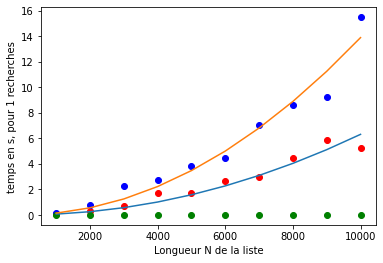

In [8]:
from timeit import Timer
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
def tri_insertion(tab):
    """tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien)."""
    n=len(tab)
    #compt=0
    for i in range (n-1):
        j=i+1
        # version sans permutation des valeurs
        #temp=tab[j]
        #while j >0 and temp<tab[j-1]:
        #    tab[j]=tab[j-1]
        #    j=j-1
        #tab[j]=temp
        # version avec permutation des valeurs
        while j>0 and tab[j]<tab[j-1]:
            tab[j],tab[j-1]=tab[j-1],tab[j]
            j=j-1
            #compt=compt+1
    #return compt

def tri_selection(tab):
    """tab est un tableau de n valeurs numériques qui peut être trié en place (tab est modifié mais la fonction ne retourne rien)."""
    n=len(tab)
    #compt=0
    for i in range(n-1):
        i_mini=i
        mini=tab[i]
        for j in range(i+1,n):
            if tab[j]<mini :
                i_mini=j
                mini=tab[j]
            #compt=compt+1
        tab[i],tab[i_mini]=tab[i_mini],tab[i]
    #return compt
def quadratique (x,a): # fonction quadratique de la forme y=f(a*x²)
    return a*x*x

# Faire une boucle sur les valeurs de n pour calculer les temps d'exécution sur chacun des 3 algorithmes
# La liste abscisse contiendra les valeurs de N, les listes ordonnee1, ordonnee2 et ordonnee3 contiendront les temps
# d'exécution des 3 algorihtmes. 
abscisse=[]
ordonnee1=[]
ordonnee2=[]
ordonnee3=[]
modele1=[]
modele2=[]

Nbessai=1 # Nombre d'essais pour prendre la plus petite durée
Nbrepet=1 # Nombre de répétitions à chaque essai
debut=1000 # Première valeur de N
fin=11000 # Dernière valeur de N
inc=1000 # Incrément de N entre 2 valeurs

for N in range(debut,fin,inc): # la taille N du tableau varie de debut à fin par pas de inc
    print('N = ',N)
    abscisse.append(N) # N sera en abscisse
#    L=[randint(0,N) for k in range(N)] # on génère un tableau d'entiers aléatoire entre 0 et N : moyenne des cas
#    L= ... #à compléter pour le pire des cas
#    L= ... #à compléter pour le meilleur des cas
    t1 = Timer(setup="L=[randint(0,N) for k in range(N)]", stmt="tri_selection(L)", globals=globals()) # on crée un timer pour tri_selection
    ordonnee1.append(min(t1.repeat(Nbessai,Nbrepet))) # on ajoute à ordonnée 1 le temps minimum sur Nbessai essais de Nbrepet recherches
    t2 = Timer(setup="L=[randint(0,N) for k in range(N)]", stmt="tri_insertion(L)", globals=globals())  # on crée un timer pour tri_insertion
    ordonnee2.append(min(t2.repeat(Nbessai,Nbrepet))) # on ajoute à ordonnée 2 le temps minimum sur Nbessai essais de Nbrepet recherches
    t3 = Timer(setup="L=[randint(0,N) for k in range(N)]", stmt="sorted(L)", globals=globals()) # on crée un timer pour sorted
    ordonnee3.append(min(t3.repeat(Nbessai,Nbrepet))) # on ajoute à ordonnée 3 le temps minimum sur Nbessai essais de Nbrepet recherches

#calcul des paramètres de modélisation pour ordonnee1 et ordonnee2
parametres1, covariance = curve_fit(quadratique, abscisse, ordonnee1) 
parametres2, covariance = curve_fit(quadratique, abscisse, ordonnee2)

for i in range(len(abscisse)) : #construction des ordonnées pour les 2 modèles
    modele1.append(quadratique(abscisse[i],*parametres1))
    modele2.append(quadratique(abscisse[i],*parametres2))
    
# courbes pour les modèles avec légende    
plt.plot(abscisse,modele1)
plt.plot(abscisse,modele2)
print('Modele sélection : y = {:.2E}*N²'.format(*parametres1))
print('Modele insertion : y = {:.2E}*N²'.format(*parametres2))

# nom des axes    
plt.xlabel('Longueur N de la liste')
plt.ylabel('temps en s, pour {} recherches'.format(Nbessai))
# definition des courbes
plt.scatter(abscisse,ordonnee1,color='red')
plt.scatter(abscisse,ordonnee2,color='blue')
plt.scatter(abscisse,ordonnee3,color='green')
#tracé du graphique
plt.show()

## 3. Preuve de la correction

### 3.1 Tri par sélection

**L'invariant de boucle** est :  
> "A la fin de l'itération $i$, les $i+1$ premiers éléments du tableau sont triés par ordre croissant et le reste du tableau (non trié) ne contient que des valeurs supérieures ou égales à celles déjà triées".

**Q6. Montrer que cette propriété est vraie pour $i=0$, puis, que si elle est vraie pour $i=k$ alors elle est encore vraie pour $i=k+1$.**

**Réponse :**

*A compléter ...*

### 3.2 Tri par insertion

**L'invariant de boucle** est :  
> "A la fin de l'itération $i$, les $i+2$ premiers éléments du tableau sont triés par ordre croissant".

**Q7. Montrer que cette propriété est vraie pour $i=0$, puis, que si elle est vraie pour $i=k$ alors elle est encore vraie pour $i=k+1$.**

**Réponse :** 

*A compléter ...*